In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'C:\\Users\\Dell\\Downloads\\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'C:\\Users\\Dell\\Downloads\\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\\ssd_mobilenet_v3_large_coco_2020_01_14\\frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classbabels = []
file_name = 'C:\\Users\\Dell\\Downloads\\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\\coco.txt'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classlabels))

80


In [7]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))  # Pass mean values as a tuple
model.setInputSwapRB(True)

< cv2.dnn.Model 000001FC97E0B830>

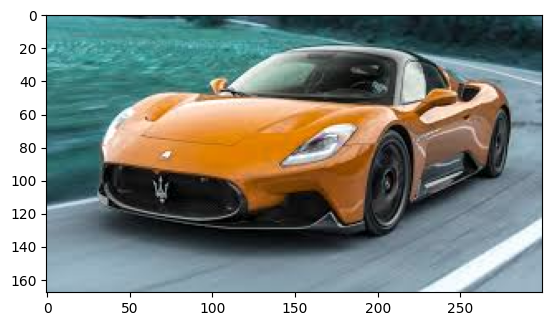

In [8]:
img = cv2.imread('C:\\Users\\Dell\\Downloads\\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\\images.jpg')
plt.imshow(img)

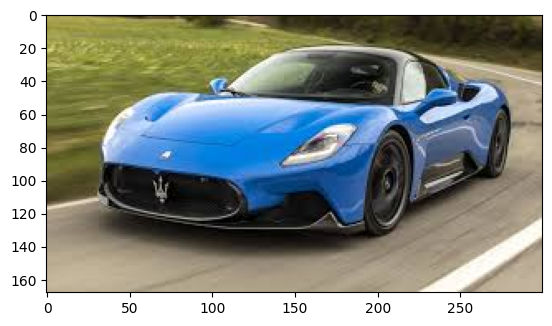

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[3]


In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex, confidece, bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

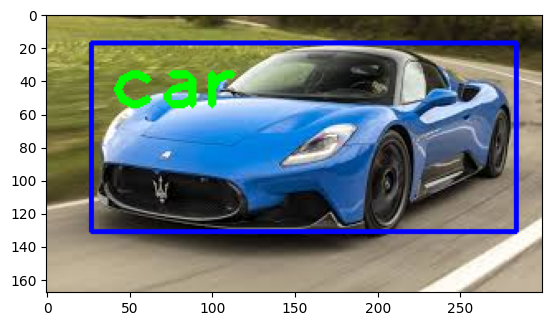

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Video capture opened successfully.
[ 1  1 62 62  1 62  1]


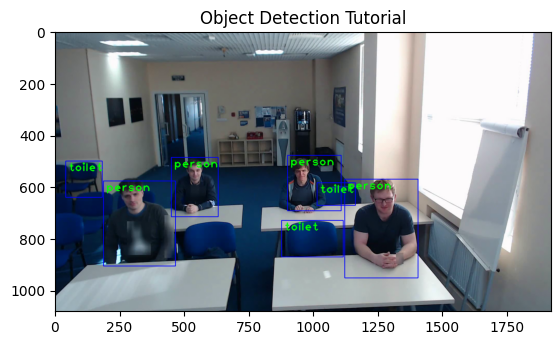

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [25]:
cap = cv2.VideoCapture("classroom.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")

print("Video capture opened successfully.")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
          if(ClassInd<=80):
            cv2.rectangle(frame, boxes, (255, 0, 0), 2)
            cv2.putText(frame, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    # cv2.imshow('Object Detection Tutorial', frame)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Object Detection Tutorial')
    plt.show()
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()